<a href="https://colab.research.google.com/github/abhi247ai/tensorflow_sessions/blob/main/Cifar_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt

In [2]:
#load and split dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


#normalize pixel values 0 to 1

train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog','frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
type(train_images), type(test_images)

(numpy.ndarray, numpy.ndarray)

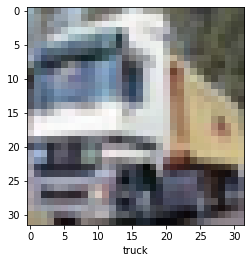

In [9]:
#lets see one image
IMG_INDEX = 1

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Layer - 1: 
The input shape our data is 32,32,3. We will process 32 filters of size 3X3 over our input data. We will also apply the actvation function 'relu' to the output of each convolution operation.
Layer - 2: 
This layer performs the max pooling using 2 x 2 samples and a stride 2
Other Layers:
The next sets layers do similar but take input the FEATURE MAP of the previous layers. They also increase the frequency of filters from 32 to 64

In [19]:
# CNN Architecture

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Adding Dense Layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

The flatten layer changes the shape our data so that can feed it to 64 node of dense layers, followed by output ayers (10 neurons) one of each class.

Training:
Now we train and compile the model using hyperparameters from tensorflow.
This step takes more time then previous steps:


In [25]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5474 - accuracy: 0.4321 - val_loss: 1.3450 - val_accuracy: 0.5223
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1789 - accuracy: 0.5823 - val_loss: 1.0873 - val_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0270 - accuracy: 0.6398 - val_loss: 0.9953 - val_accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9348 - accuracy: 0.6713 - val_loss: 0.9364 - val_accuracy: 0.6676
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8738 - accuracy: 0.6914 - val_loss: 0.8947 - val_accuracy: 0.6832
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8181 - accuracy: 0.7123 - val_loss: 0.8952 - val_accuracy: 0.6828
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7715 - accuracy: 0.7275 - val_loss: 0.8984 -

In [26]:
# MODEL EVALUATION

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 3s - loss: 0.8478 - accuracy: 0.7114


Here, we got less accuracy in CNN it is because that we have less data for various labels. Therefore, model is not able to distinguish in deeper. Now, we can overcome this overfitting problem of CNN on small datasets.


**DATA AUGMENTATION**

To avoid overfitting and create larger dataset from smaller dataset, we use a technique called data augmentation.
This is simply performing random transformation in our images so that model can generalized better.
These transformation like rotations, color changes, compression, streches: keras does this for us: Let see!!!!!!

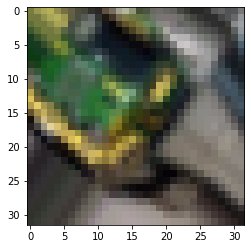

In [31]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#data generator object for image transformation
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

#picking an image for transformation
test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i +=1
  if i > 4:
    break
  
plt.show()



What if Data Augmentation also not help us in reducing loss?
**PRE-TRAINED MODELS**
